In [1]:
import pandas as pd 
stats = pd.read_csv('./data/charcters_stats.csv')
stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


## Core Mission

In [2]:
stats.sort_values(by='Total', ascending=False).iloc[0]['Name']

'Martian Manhunter'

Alignment가 null인 row는 3개이므로 무시

In [3]:
print(stats[stats['Alignment'].isnull()])
stats = stats[~stats['Alignment'].isnull()]

           Name Alignment  Intelligence  Strength  Speed  Durability  Power  \
28   Anti-Venom       NaN            75        60     65          90     85   
98    Blackwulf       NaN            50        28      8          30     59   
560   Trickster       NaN             1         1      1           1      0   

     Combat  Total  
28       84    459  
98       25    200  
560       1      5  


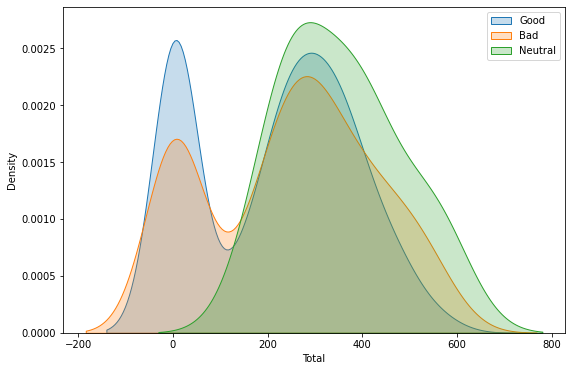

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
good = stats[stats['Alignment'] == 'good']
bad = stats[stats['Alignment'] == 'bad']
neutral = stats[stats['Alignment'] == 'neutral']
sns.kdeplot(x='Total', data=good, ax=ax, fill=True, label='Good')
sns.kdeplot(x='Total', data=bad, ax=ax, fill=True, label='Bad')
sns.kdeplot(x='Total', data=neutral, ax=ax, fill=True, label='Neutral')
plt.legend()
plt.show()

전체 스텟의 합의 경향은 neutral > bad > good 인 것으로 확인된다.

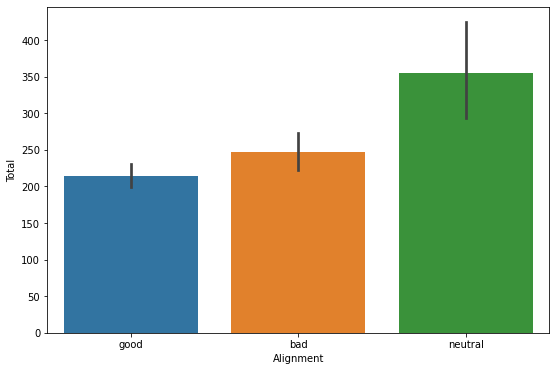

In [5]:
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='Alignment', y='Total', data=stats, ax=ax)
plt.show()

각 6가지 스텟에 대해서 그려보면, 6가지 스텟 모두 neutral > bad > good 순인 것으로 확인된다.

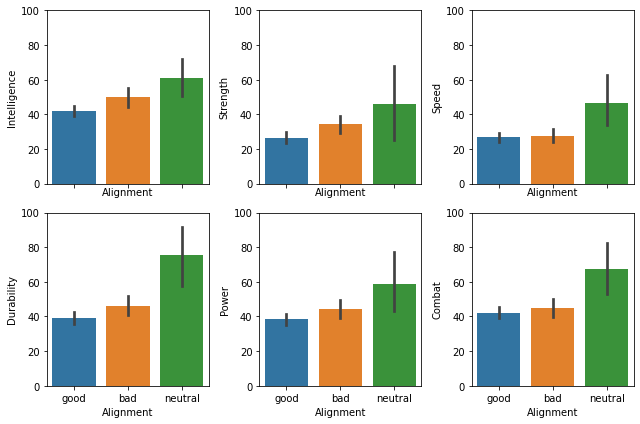

In [6]:
stats_cols = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
fig, axs = plt.subplots(2, 3, figsize=[9, 6], sharex=True)
for i, col in enumerate(stats_cols):
    sns.barplot(x='Alignment', y=col, data=stats, ax=axs[i//3][i%3])
    axs[i//3][i%3].set_ylim(0, 100)
plt.tight_layout()
plt.show()

## Extra Mission

In [7]:
stats = pd.read_csv('./data/charcters_stats.csv')
info = pd.read_csv('./data/marvel_characters_info.csv')
info.head()

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


In [8]:
stats_pub = stats.merge(info[['Name', 'Publisher']], how='left', on='Name')
stats_pub.groupby(by='Publisher')['Total'].mean().sort_values(ascending=False).index[0]

'Shueisha'

In [9]:
class AverageMeter():
    def __init__(self, sum=0, count=0):
        self.sum = sum
        self.count = count
        self.avg = sum / count if count != 0 else 0
    
    def update(self, val):
        self.sum += val
        self.count += 1
        self.avg = self.sum / self.count

In [10]:
epochs = 1
random_state = 42
good = stats[stats['Alignment'] == 'good']['Total']
bad = stats[stats['Alignment'] == 'bad']['Total']
neutral = stats[stats['Alignment'] == 'neutral']['Total']
neutral_size = neutral.shape[0]

good_count, bad_count = 0, 0

for _ in range(epochs):
    good_meter = AverageMeter(sum=good.sum(), count=good.count())
    bad_meter = AverageMeter(sum=bad.sum(), count=bad.count())

    neutral_shuffle = neutral.sample(frac=1.0, random_state=random_state)
    for i in range(neutral_size):
        print(f'Good: {good_meter.avg}, Bad: {bad_meter.avg}')
        if good_meter.avg > bad_meter.avg:
            bad_meter.update(neutral_shuffle.iloc[i])
        else:
            good_meter.update(neutral_shuffle.iloc[i])

    if good_meter.avg > bad_meter.avg:
        good_count += 1
    else:
        bad_count += 1

Good: 214.99074074074073, Bad: 247.21212121212122
Good: 215.0461893764434, Bad: 247.21212121212122
Good: 215.8179723502304, Bad: 247.21212121212122
Good: 215.77241379310345, Bad: 247.21212121212122
Good: 215.90825688073394, Bad: 247.21212121212122
Good: 216.2517162471396, Bad: 247.21212121212122
Good: 216.65981735159818, Bad: 247.21212121212122
Good: 217.0478359908884, Bad: 247.21212121212122
Good: 217.53181818181818, Bad: 247.21212121212122
Good: 217.62131519274377, Bad: 247.21212121212122
Good: 218.38009049773757, Bad: 247.21212121212122


어떠한 상황에서도 Bad의 평균이 높으므로, 항상 Bad 캐릭터들이 승리한다.